In [74]:
# Feel free to import any other libraries and modules.

import numpy as np

import matplotlib.pyplot as plt

import torch

from torchvision import datasets, transforms

import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

from torch import nn


# Part One: Optimization Algorithms

## 1. Gradient Descent

The Gradient Descent (GD) algorithm finds the minimum of a given

function by taking small steps along the function's gradient:



>$\Theta \leftarrow \Theta_0$



>**while** stop condition not met **do**



>$~~~~$$\Theta \leftarrow \Theta - \alpha \nabla_\Theta f(\Theta)$



>**end while**



where $f$ is the function to minimize, $\nabla_\Theta f(\Theta)$

denotes $f$'s gradient at $\Theta$ and $\alpha$ is the learning rate.



**Task1:** Implement the GD algorithm as a function:



  \begin{equation}

      \Theta_{opt} = \text{GD}(f, \Theta_0, \alpha, \rho)

  \end{equation}

where $f$ is a function returning the cost and its gradient with respect to parameter vector $\Theta$, $\Theta_0$ is the initial value, and $\alpha$

is the learning rate. You can assume that $\alpha$. remains constant during the optimization. $\rho$ is stop condition. \\

Then, use the GD algorithm to find the optimum of the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) (Consider $a=1, b=100$).

 \\

Also, plot the values found by GD at subsequent iterations.



## 2. Newton's Method

Newton's method is an iterative optimization algorithm used to find the minimum of a function.

The basic update step in Newton's method is given by:



\begin{equation}

\Theta = \Theta - H^{-1} \cdot \nabla f(\Theta)

\end{equation}





Where  $ H $ is the Hessian matrix of the function at $ \Theta $, and $ H^{-1} $ is the inverse of the Hessian matrix, used to adjust the step size and direction more accurately than just using the gradient alone (as done in gradient descent).



#### Line Search

Sometimes, Newton's method may take too large of a step, which can lead to divergence. To prevent this, a simple **line search** is used. This reduces the step size $ \alpha $ if the function value doesn't improve after the step.



Steps:

1. Compute the gradient and Hessian matrix at the current point.

2. Calculate the step direction by multiplying the inverse of the Hessian with the gradient.

3. Update the point by subtracting the step from the current point.

4. If the function value doesn't improve, reduce the step size $ \alpha $.

5. Repeat until the gradient becomes sufficiently small (close to zero), indicating convergence.







**Task2:** Implement Newton's method and compare it with the gradient descent. You will also need to implement a line search alogithm, e.g. (https://en.wikipedia.org/wiki/Backtracking_line_search) and make sure that the Newton's direction is indeed one along which the function is minimized.


Convergence achieved at step 54319 with gradient norm 1.00e-10.
Found optimum at [1. 1.] in 54320 steps (true minimum is at [1, 1]).


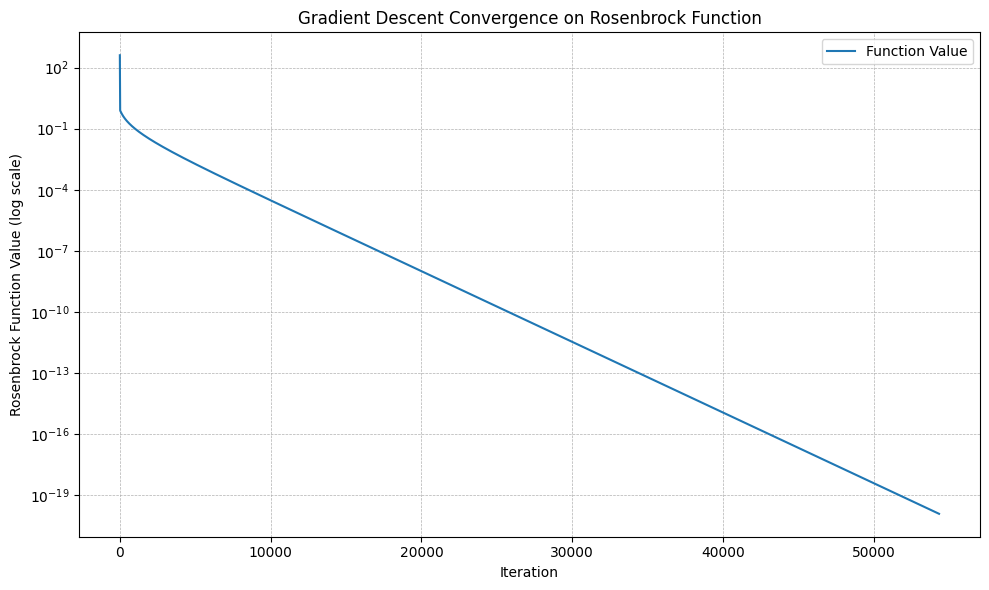

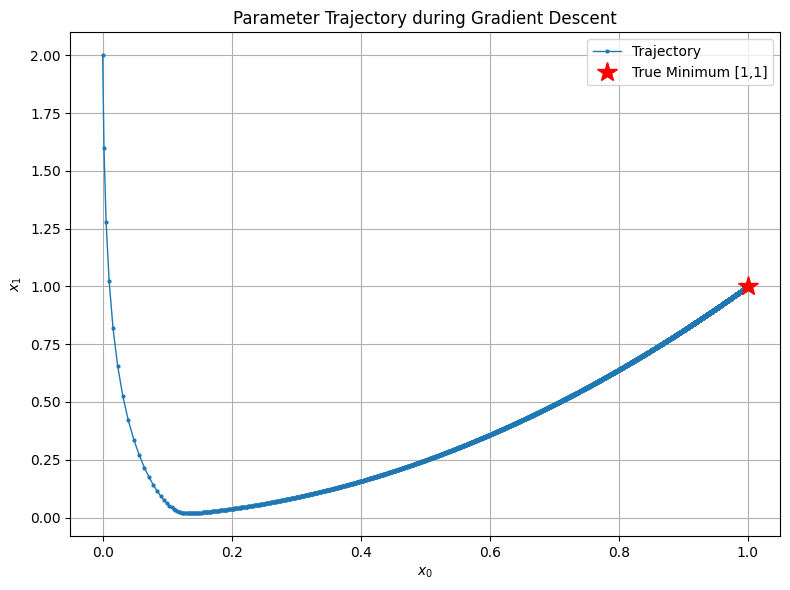

In [75]:


def rosenbrock(x):
    """
    Computes the Rosenbrock function value and its gradient at a 2D point x.

    Args:
        x (array-like): A 2-dimensional vector.
    Returns:
        tuple: Function value and gradient as a NumPy array.
    """
    a, b = 1, 100
    x0, x1 = x
    func_val = (a - x0)**2 + b * (x1 - x0**2)**2
    grad_x0 = -2 * (a - x0) - 4 * b * x0 * (x1 - x0**2)
    grad_x1 = 2 * b * (x1 - x0**2)
    gradient = np.array([grad_x0, grad_x1])
    return func_val, gradient

def rosenbrock_hessian(x):
    """
    Computes the Hessian matrix of the Rosenbrock function at a 2D point x.

    Args:
        x (array-like): A 2-dimensional vector.

    Returns:
        tuple: Function value, gradient, and Hessian matrix as a NumPy array.
    """
    value, grad = rosenbrock(x)
    x0, x1 = x
    hess_x0x0 = 2 - 4 * 100 * x1 + 1200 * x0**2
    hess_x0x1 = -4 * x0
    hess_x1x0 = -4 * x0
    hess_x1x1 = 200
    hessian_matrix = np.array([[hess_x0x0, hess_x0x1],
                               [hess_x1x0, hess_x1x1]])
    return value, grad, hessian_matrix

def GD(f, theta0, alpha, stop_tolerance=1e-10, max_steps=1_000_000):
    """
    Executes the Gradient Descent algorithm on a given function.
    Args:
        f (callable): Function that returns value and gradient.
        theta0 (array-like): Initial guess for the parameters.
        alpha (float): Learning rate.
        stop_tolerance (float, optional): Threshold for gradient norm to stop. Defaults to 1e-10.
        max_steps (int, optional): Maximum iterations. Defaults to 1_000_000.
    Returns:
        tuple: Optimal parameters and history of iterations.
    """
    history = []
    theta = np.array(theta0, dtype=float)
    step = 0

    for step in range(max_steps):
        func_val, grad = f(theta)
        history.append((theta.copy(), func_val))

        # Update parameters
        theta -= alpha * grad

        # Check for convergence
        grad_norm = np.linalg.norm(grad)
        if grad_norm < stop_tolerance:
            print(f"Convergence achieved at step {step} with gradient norm {grad_norm:.2e}.")
            break

        # Optionally, print progress every 100,000 steps
        if (step + 1) % 100_000 == 0:
            print(f"Step {step + 1}: Function value = {func_val:.4e}, Gradient norm = {grad_norm:.2e}")

    else:
        print(f"Reached maximum steps ({max_steps}) without convergence.")

    return theta, history

def plot_convergence(history):
    """
    Plots the convergence of the function value over iterations.

    Args:
        history (list): List of tuples containing parameters and function values.
    """
    iterations = range(len(history))
    func_values = [val for _, val in history]

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, func_values, label='Function Value')
    plt.yscale('log')
    plt.xlabel("Iteration")
    plt.ylabel("Rosenbrock Function Value (log scale)")
    plt.title("Gradient Descent Convergence on Rosenbrock Function")
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_trajectory(history):
    """
    Plots the trajectory of the parameters in the parameter space.

    Args:
        history (list): List of tuples containing parameters and function values.
    """
    params = np.array([theta for theta, _ in history])
    x0, x1 = params[:, 0], params[:, 1]

    plt.figure(figsize=(8, 6))
    plt.plot(x0, x1, 'o-', markersize=2, linewidth=1, label='Trajectory')
    plt.plot(1, 1, 'r*', markersize=15, label='True Minimum [1,1]')
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.title("Parameter Trajectory during Gradient Descent")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Initialize starting point
initial_theta = [0.0, 2.0]

# Execute Gradient Descent
optimal_theta, history = GD(rosenbrock, initial_theta, alpha=1e-3, stop_tolerance=1e-10, max_steps=int(1e6))

print(f"Found optimum at {optimal_theta} in {len(history)} steps (true minimum is at [1, 1]).")

# Plot the convergence of function values
plot_convergence(history)

# Plot the trajectory of parameters
plot_trajectory(history)


Convergence achieved at step 17158 with gradient norm 9.99e-11.
Found optimum at [1. 1.] (true minimum is at [1, 1]).


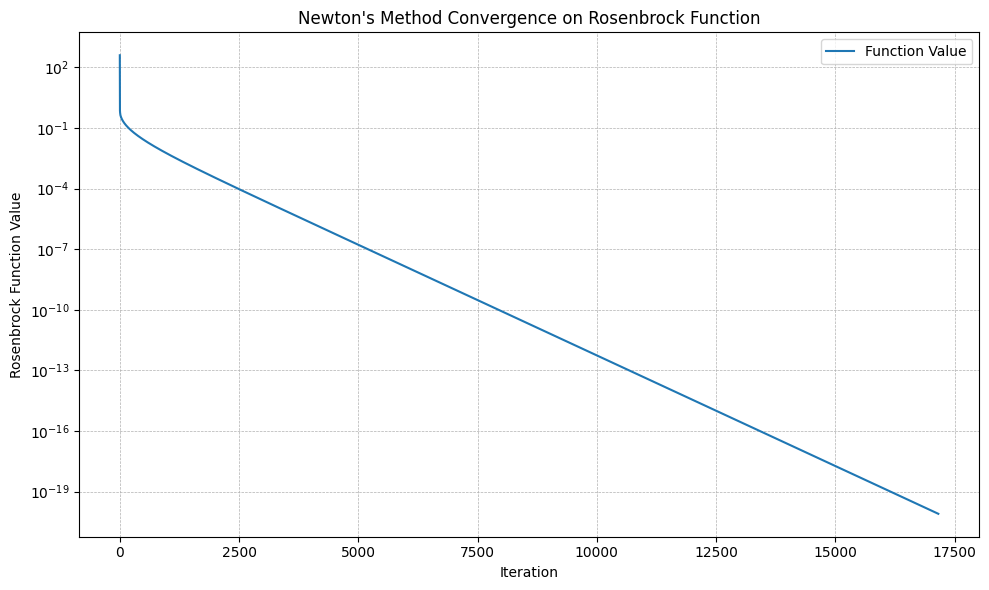

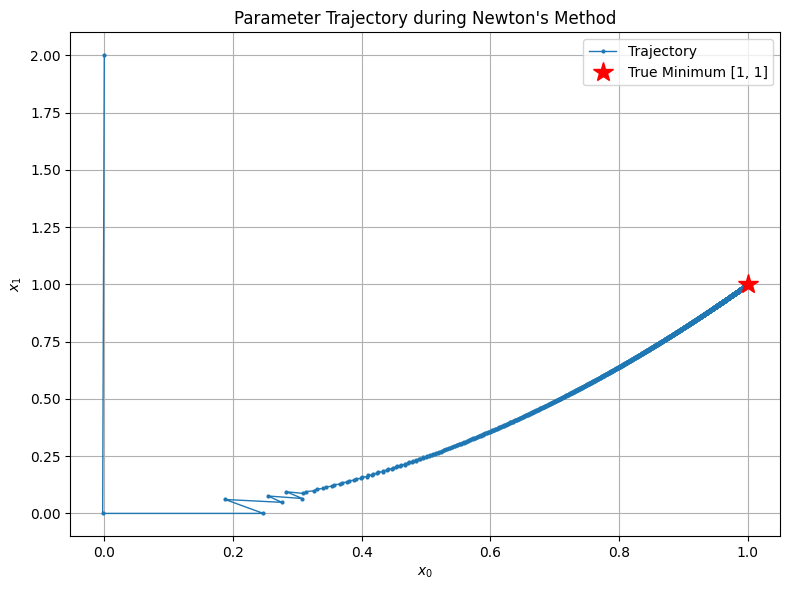

In [76]:

def backtracking_line_search(f, theta, grad, direction, alpha=1, beta=0.5, c=1e-4):
    """
    Performs a backtracking line search to find an appropriate step size.

    Args:
        f (callable): Function to optimize, returning value, gradient, and Hessian.
        theta (np.ndarray): Current parameter vector.
        grad (np.ndarray): Gradient at the current parameter vector.
        direction (np.ndarray): Descent direction (e.g., Newton's direction).
        alpha (float, optional): Initial step size. Defaults to 1.
        beta (float, optional): Step size reduction factor. Defaults to 0.5.
        c (float, optional): Armijo condition constant. Defaults to 1e-4.

    Returns:
        float: Optimal step size after backtracking.
    """
    current_val, _, _ = f(theta)  # Current function value
    while True:
        new_theta = theta + alpha * direction
        new_val, _, _ = f(new_theta)  # Function value at new position
        if new_val <= current_val + c * alpha * np.dot(grad, direction):
            break
        alpha *= beta  # Reduce step size
    return alpha

def Newton(f, theta0, alpha=1, stop_tolerance=1e-10, max_steps=1_000_000):
    """
    Executes Newton's optimization method with a backtracking line search.

    Args:
        f (callable): Function to optimize, returning value, gradient, and Hessian.
        theta0 (array-like): Initial guess for the parameters.
        alpha (float, optional): Initial step size for backtracking. Defaults to 1.
        stop_tolerance (float, optional): Gradient norm threshold for convergence. Defaults to 1e-10.
        max_steps (int, optional): Maximum number of iterations. Defaults to 1,000,000.

    Returns:
        tuple:
            - np.ndarray: Optimal parameter vector found by the algorithm.
            - list: History of iterations containing tuples (theta, value, gradient).
    """
    parameter = np.array(theta0, dtype=float)
    history = []
    step_count = 0

    for step_count in range(max_steps):
        func_val, gradient, hessian = f(parameter)
        history.append((parameter.copy(), func_val, gradient.copy()))

        # Check for convergence based on gradient norm
        grad_norm = np.linalg.norm(gradient)
        if grad_norm < stop_tolerance:
            print(f"Convergence achieved at step {step_count} with gradient norm {grad_norm:.2e}.")
            break

        # Compute Newton's direction: solve H * direction = -grad
        try:
            direction = -np.linalg.solve(hessian, gradient)
        except np.linalg.LinAlgError:
            print(f"Hessian is singular or not invertible at step {step_count}.")
            break

        # Determine step size using backtracking line search
        step_size = backtracking_line_search(f, parameter, gradient, direction, alpha=alpha)

        # Update parameters
        parameter += step_size * direction

        # Optional: Print progress at regular intervals
        if (step_count + 1) % 100_000 == 0:
            print(f"Step {step_count + 1}: Function value = {func_val:.4e}, Gradient norm = {grad_norm:.2e}")

    else:
        print(f"Reached maximum iterations ({max_steps}) without full convergence.")

    return parameter, history

def plot_newton_convergence(history):
    """
    Plots the convergence of the function value over iterations for Newton's method.

    Args:
        history (list): List of tuples containing (theta, value, gradient).
    """
    iterations = range(len(history))
    func_values = [entry[1] for entry in history]

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, func_values, label='Function Value')
    plt.yscale('log')
    plt.xlabel("Iteration")
    plt.ylabel("Rosenbrock Function Value")
    plt.title("Newton's Method Convergence on Rosenbrock Function")
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_newton_trajectory(history):
    """
    Plots the trajectory of the parameters in the parameter space during Newton's method.

    Args:
        history (list): List of tuples containing (theta, value, gradient).
    """
    parameters = np.array([entry[0] for entry in history])
    x0_vals, x1_vals = parameters[:, 0], parameters[:, 1]

    plt.figure(figsize=(8, 6))
    plt.plot(x0_vals, x1_vals, 'o-', markersize=2, linewidth=1, label='Trajectory')
    plt.plot(1, 1, 'r*', markersize=15, label='True Minimum [1, 1]')
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.title("Parameter Trajectory during Newton's Method")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Initialize starting point
initial_theta = [0.0, 2.0]

# Execute Newton's Method
optimal_theta, history = Newton(rosenbrock_hessian, initial_theta)

print(f"Found optimum at {optimal_theta} (true minimum is at [1, 1]).")

# Plot the convergence of function values
plot_newton_convergence(history)

# Plot the trajectory of parameters
plot_newton_trajectory(history)


# for this part I will copy & paste .py codes in cells, I use Kaggle and this way is more easier than import it 

## Optimizer

In [77]:
class SGD:
    def __init__(self, params, learning_rate, momentum=0.0):
        self.params = list(params)
        self.learning_rate = learning_rate
        self.momentum = momentum
        # Initialize velocity on the same device as parameters
        self.velocity = [torch.zeros_like(param, device=param.device) for param in self.params]

    def step(self):
        with torch.no_grad():
            for i, param in enumerate(self.params):
                if param.grad is not None:
                    # Ensure velocity is on the same device as param
                    self.velocity[i] = self.velocity[i].to(param.device)
                    # Update velocity with momentum
                    self.velocity[i] = self.momentum * self.velocity[i] + param.grad
                    # Apply update to parameters
                    param -= self.learning_rate * self.velocity[i]

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()


## Layers 

In [78]:
""" Fully Connected Layer with Xavier Initialization """
class FCLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FCLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        # Xavier initialization for weights
        self.weights = nn.Parameter(torch.randn(input_dim, output_dim) * (2 / (input_dim + output_dim))**0.5)
        self.bias = nn.Parameter(torch.zeros(1, output_dim))
        self.input_data = None

    def forward(self, input_data):
        """
        Forward pass for fully connected layer.
        
        Args:
            input_data: Input tensor of shape (batch_size, input_dim)
        
        Returns:
            Tensor of shape (batch_size, output_dim) after linear transformation.
        """
        self.input_data = input_data  # Store input for backward pass
        return input_data @ self.weights + self.bias  # Linear transformation

    def backward(self, grad_output):
        """
        Backward pass for fully connected layer.
        
        Args:
            grad_output: Gradient of the loss w.r.t. output, shape (batch_size, output_dim)
        
        Returns:
            Gradient of the loss w.r.t. input, shape (batch_size, input_dim)
        """
        # Compute gradients for weights and biases
        self.grad_weights = self.input_data.T @ grad_output / grad_output.shape[0]
        self.grad_bias = grad_output.mean(dim=0, keepdim=True)
        
        # Return gradient of loss w.r.t. input for previous layer
        return grad_output @ self.weights.T


""" Sigmoid Activation Layer """
class SigmoidLayer(nn.Module):
    def __init__(self):
        super(SigmoidLayer, self).__init__()
        self.activated_output = None

    def forward(self, input_data):
        """
        Forward pass for sigmoid activation.
        
        Args:
            input_data: Input tensor of any shape.
        
        Returns:
            Tensor with sigmoid applied element-wise.
        """
        self.activated_output = torch.sigmoid(input_data)  # Apply sigmoid activation
        return self.activated_output

    def backward(self, grad_output):
        """
        Backward pass for sigmoid layer.
        
        Args:
            grad_output: Gradient of the loss w.r.t. output, same shape as input_data
        
        Returns:
            Gradient of the loss w.r.t. input for previous layer.
        """
        # Derivative of sigmoid function
        return grad_output * self.activated_output * (1 - self.activated_output)


""" ReLU Activation Layer """
class ReLULayer(nn.Module):
    def __init__(self):
        """
        Initialize the ReLU activation layer.
        """
        super(ReLULayer, self).__init__()
        self.input_data = None  # Store input for backward pass

    def forward(self, input_data):
        """
        Forward pass using the ReLU function.
        
        Args:
            input_data: Tensor of shape (batch_size, num_features), input features.
        
        Returns:
            Output after applying ReLU (max(0, x)).
        """
        self.input_data = input_data  # Store input for backward pass
        return torch.maximum(input_data, torch.tensor(0.0, device=input_data.device))

    def backward(self, grad_output):
        """
        Backward pass for ReLU layer.
        
        Args:
            grad_output: Gradient from the next layer, shape (batch_size, num_features).
        
        Returns:
            Gradient to pass to the previous layer.
        """
        # ReLU derivative: 1 for positive inputs, 0 for non-positive
        relu_grad = (self.input_data > 0).float()
        return grad_output * relu_grad  # Element-wise multiplication for gradients


""" Dropout Layer """
class DropoutLayer(nn.Module):
    def __init__(self, dropout_prob):
        """
        Initialize the Dropout layer.
        
        Args:
            dropout_prob: Probability of dropping a neuron during training.
        """
        super(DropoutLayer, self).__init__()
        self.dropout_prob = dropout_prob
        self.dropout_mask = None

    def forward(self, input_data):
        """
        Apply Dropout during training. Disabled during evaluation.
        Args:
            input_data: Input tensor of any shape.
    
        Returns:
            Tensor of the same shape with dropout applied in training mode.
        """
        if self.training:
            # Generate dropout mask (1 - dropout_prob) to keep neurons
            self.dropout_mask = (torch.rand_like(input_data) > self.dropout_prob).float()
            return input_data * self.dropout_mask / (1 - self.dropout_prob)  # Scaled dropout
        else:
            return input_data  # No dropout during evaluation

    def backward(self, grad_output):
        """
        Backward pass for dropout layer.
        
        Args:
            grad_output: Gradient from next layer, of any shape.
        
        Returns:
            Gradient with respect to input.
        """
        if self.training and self.dropout_mask is not None:
            # Apply dropout mask to gradients during training
            return grad_output * self.dropout_mask / (1 - self.dropout_prob)
        return grad_output


## Solver 

In [79]:


def train(model, criterion, optimizer, data_loader, epochs, device):
    """Trains the model over a specified number of epochs."""
    model = model.to(device)
    training_loss_history, training_accuracy_history = [], []

    for epoch_num in range(1, epochs + 1):
        model.train()  # Set the model to training mode
        epoch_losses, epoch_accuracies = [], []

        # Training loop for one epoch
        for batch_data in data_loader:
            batch_loss, batch_accuracy = train_single_batch(model, criterion, optimizer, batch_data, device)
            epoch_losses.append(batch_loss)
            epoch_accuracies.append(batch_accuracy)

        # Calculate and record average loss and accuracy for the epoch
        avg_epoch_loss = np.mean(epoch_losses)
        avg_epoch_accuracy = np.mean(epoch_accuracies)
        training_loss_history.append(avg_epoch_loss)
        training_accuracy_history.append(avg_epoch_accuracy)

        print(f"Epoch [{epoch_num}/{epochs}] - Loss: {avg_epoch_loss:.4f}, Accuracy: {avg_epoch_accuracy:.4f}")

    return model


def train_single_batch(model, loss_fn, optimizer, batch_data, device):
    """Trains the model on a single batch of data."""
    batch_inputs, batch_labels = batch_data
    batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

    # Forward pass
    batch_outputs = model(batch_inputs)
    batch_loss = loss_fn(batch_outputs, batch_labels)

    # Backward pass and parameter update
    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

    # Compute batch accuracy
    binary_predictions = (batch_outputs > 0.5).float()
    batch_accuracy = (binary_predictions == batch_labels).float().mean().item()

    return batch_loss.item(), batch_accuracy


def test(model, data_loader, device):
    """Evaluates the model on the test dataset."""
    model = model.to(device)
    model.eval()  # Set model to evaluation mode
    test_accuracies = []

    with torch.no_grad():  # Disable gradient calculation for efficiency
        for batch_data in data_loader:
            batch_inputs, batch_labels = batch_data
            batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

            # Forward pass
            test_outputs = model(batch_inputs)
            
            # Compute batch accuracy
            binary_predictions = (test_outputs > 0.5).float()
            batch_accuracy = (binary_predictions == batch_labels).float().mean().item()
            test_accuracies.append(batch_accuracy)

    overall_test_accuracy = np.mean(test_accuracies)
    print(f"\nOverall Test Accuracy: {overall_test_accuracy:.4f}")
    return overall_test_accuracy


# Part two: MLP for MNIST Classification

In this part, we are going to use `PyTorch`. If you want to become more familiar with it, check this resource: https://www.learnpytorch.io/



#### In this homework, you need to

- implement SGD optimizer (`./optimizer.py`)

- implement forward and backward for FCLayer (`layers.py`)

- implement forward and backward for SigmoidLayer (`layers.py`)

- implement forward and backward for ReLULayer (`layers.py`)

- implement forward and backward for DropoutLayer (`layers.py`)

- implement train and test process (`solver.py`)

In [80]:
seed = 42

torch.manual_seed(seed)

np.random.seed(seed)

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [81]:
# Load MNIST dataset

# Converts PIL image to tensor and scales to [0, 1] and flatten it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)),
])

# Load MNIST dataset with the defined transform
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# One-hot encoding for labels
def decode_label(label, num_classes=10):
    return torch.nn.functional.one_hot(torch.tensor(label), num_classes=num_classes).float()

# Preprocess labels and combine with transformed images
y_train = [decode_label(label) for _, label in train_dataset]
y_test = [decode_label(label) for _, label in test_dataset]

# Convert the data into tensor datasets for training and testing
train_dataset = TensorDataset(torch.stack([img for img, _ in train_dataset]), torch.stack(y_train))
test_dataset = TensorDataset(torch.stack([img for img, _ in test_dataset]), torch.stack(y_test))

# Create data loaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [82]:
num_epoch = 20

criterion = nn.MSELoss()

# Build MLP with FCLayer and SigmoidLayer you've implemented in layers.py
sigmoidMLP = nn.Sequential(
    FCLayer(784, 128),
    SigmoidLayer(),
    FCLayer(128, 10)
)
# Initialize optimizer you've implemented in optimizer.py
sgd = SGD(params=sigmoidMLP.parameters(), learning_rate=0.01)
# Train the model using train function you've implemented in solver.py
sigmoidMLP = train(sigmoidMLP, criterion, sgd, train_dataloader, num_epoch, device=device)

Epoch [1/20] - Loss: 0.0771, Accuracy: 0.9054
Epoch [2/20] - Loss: 0.0556, Accuracy: 0.9307
Epoch [3/20] - Loss: 0.0506, Accuracy: 0.9429
Epoch [4/20] - Loss: 0.0482, Accuracy: 0.9486
Epoch [5/20] - Loss: 0.0466, Accuracy: 0.9516
Epoch [6/20] - Loss: 0.0456, Accuracy: 0.9538
Epoch [7/20] - Loss: 0.0448, Accuracy: 0.9553
Epoch [8/20] - Loss: 0.0442, Accuracy: 0.9565
Epoch [9/20] - Loss: 0.0437, Accuracy: 0.9575
Epoch [10/20] - Loss: 0.0432, Accuracy: 0.9582
Epoch [11/20] - Loss: 0.0429, Accuracy: 0.9587
Epoch [12/20] - Loss: 0.0426, Accuracy: 0.9592
Epoch [13/20] - Loss: 0.0423, Accuracy: 0.9596
Epoch [14/20] - Loss: 0.0420, Accuracy: 0.9600
Epoch [15/20] - Loss: 0.0418, Accuracy: 0.9604
Epoch [16/20] - Loss: 0.0415, Accuracy: 0.9606
Epoch [17/20] - Loss: 0.0413, Accuracy: 0.9608
Epoch [18/20] - Loss: 0.0411, Accuracy: 0.9611
Epoch [19/20] - Loss: 0.0409, Accuracy: 0.9613
Epoch [20/20] - Loss: 0.0407, Accuracy: 0.9616


In [83]:
# Test your model using test function you've implemented in solver.py
test(sigmoidMLP, test_dataloader, device)


Overall Test Accuracy: 0.9629


0.9629193414895298

In [84]:
# Build MLP with FCLayer and ReLULayer
reluMLP = nn.Sequential(
    FCLayer(784, 128),
    ReLULayer(),
    FCLayer(128, 10)
)
# Initialize optimizer
sgd = SGD(reluMLP.parameters(), learning_rate=0.01)
# Train the model
reluMLP = train(reluMLP, criterion, sgd, train_dataloader, num_epoch, device=device)

Epoch [1/20] - Loss: 0.0712, Accuracy: 0.9275
Epoch [2/20] - Loss: 0.0467, Accuracy: 0.9556
Epoch [3/20] - Loss: 0.0399, Accuracy: 0.9643
Epoch [4/20] - Loss: 0.0357, Accuracy: 0.9688
Epoch [5/20] - Loss: 0.0327, Accuracy: 0.9716
Epoch [6/20] - Loss: 0.0305, Accuracy: 0.9736
Epoch [7/20] - Loss: 0.0288, Accuracy: 0.9752
Epoch [8/20] - Loss: 0.0274, Accuracy: 0.9763
Epoch [9/20] - Loss: 0.0262, Accuracy: 0.9773
Epoch [10/20] - Loss: 0.0253, Accuracy: 0.9781
Epoch [11/20] - Loss: 0.0244, Accuracy: 0.9789
Epoch [12/20] - Loss: 0.0237, Accuracy: 0.9794
Epoch [13/20] - Loss: 0.0231, Accuracy: 0.9799
Epoch [14/20] - Loss: 0.0225, Accuracy: 0.9805
Epoch [15/20] - Loss: 0.0220, Accuracy: 0.9808
Epoch [16/20] - Loss: 0.0215, Accuracy: 0.9813
Epoch [17/20] - Loss: 0.0211, Accuracy: 0.9817
Epoch [18/20] - Loss: 0.0207, Accuracy: 0.9820
Epoch [19/20] - Loss: 0.0204, Accuracy: 0.9823
Epoch [20/20] - Loss: 0.0200, Accuracy: 0.9826


In [85]:
# Test the model
test(reluMLP, test_dataloader, device)


Overall Test Accuracy: 0.9835


0.9834564800460499

### Overfit the model

Try to overfit the reluMLP model. You can make the model as complex as you like, use subset of the data for training or any other approach you want.

Then add **DropoutLayer** to your model in order to reduce overfitting problem.

In [86]:
#TODO: overfit the reluMLP model
#TODO: add DropoutLayer to your model

#  First I tried to overfit the model to decrease test acc and then I use Dropout to Improve test acc with 500 epoch and 100 data and complex model 


In [108]:

overfit_subset = torch.utils.data.Subset(train_dataset, range(0, 100))
overfit_dataloader = DataLoader(overfit_subset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model with increased complexity for overfitting
complex_reluMLP = nn.Sequential(
    FCLayer(784, 512),
    ReLULayer(),
    FCLayer(512, 256),
    ReLULayer(),
    FCLayer(256, 128),
    ReLULayer(),
    FCLayer(128, 64),
    ReLULayer(),
    FCLayer(64, 10)
)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
sgd = SGD(complex_reluMLP.parameters(), learning_rate=0.01)

# Train the overfitted model
print("Training the overfitted model:")
complex_reluMLP = train(complex_reluMLP, criterion, sgd, overfit_dataloader, epochs=500, device=device)

# Test the overfitted model
print("Testing the overfitted model:")
test(complex_reluMLP, test_dataloader, device)

# Model with Dropout Layer to reduce overfitting
dropout_reluMLP = nn.Sequential(
    FCLayer(784, 512),
    ReLULayer(),
    DropoutLayer(0.3),
    FCLayer(512, 256),
    ReLULayer(),
    DropoutLayer(0.3),
    FCLayer(256, 128),
    ReLULayer(),
    DropoutLayer(0.3),
    FCLayer(128, 64),
    ReLULayer(),
    FCLayer(64, 10)
)

# Initialize optimizer and train with Dropout Layer
sgd = SGD(dropout_reluMLP.parameters(), learning_rate=0.01)
print("\nTraining the model with dropout to reduce overfitting:")
dropout_reluMLP = train(dropout_reluMLP, criterion, sgd, overfit_dataloader, epochs=500, device=device)

# Test the model with Dropout Layer
print("Testing the model with dropout:")
test(dropout_reluMLP, test_dataloader, device)


Training the overfitted model:
Epoch [1/500] - Loss: 2.3526
Epoch [2/500] - Loss: 2.3057
Epoch [3/500] - Loss: 2.2798
Epoch [4/500] - Loss: 2.2658
Epoch [5/500] - Loss: 2.2718
Epoch [6/500] - Loss: 2.2239
Epoch [7/500] - Loss: 2.1848
Epoch [8/500] - Loss: 2.1667
Epoch [9/500] - Loss: 2.1829
Epoch [10/500] - Loss: 2.1577
Epoch [11/500] - Loss: 2.1260
Epoch [12/500] - Loss: 2.0857
Epoch [13/500] - Loss: 2.0993
Epoch [14/500] - Loss: 2.0338
Epoch [15/500] - Loss: 2.0264
Epoch [16/500] - Loss: 2.0109
Epoch [17/500] - Loss: 2.0045
Epoch [18/500] - Loss: 1.9727
Epoch [19/500] - Loss: 1.8130
Epoch [20/500] - Loss: 1.8629
Epoch [21/500] - Loss: 1.8230
Epoch [22/500] - Loss: 1.8988
Epoch [23/500] - Loss: 1.8545
Epoch [24/500] - Loss: 1.8384
Epoch [25/500] - Loss: 1.6992
Epoch [26/500] - Loss: 1.6376
Epoch [27/500] - Loss: 1.7015
Epoch [28/500] - Loss: 1.7797
Epoch [29/500] - Loss: 1.6108
Epoch [30/500] - Loss: 1.6158
Epoch [31/500] - Loss: 1.6468
Epoch [32/500] - Loss: 1.5557
Epoch [33/500] - L

0.6924920127795527